In [44]:
import pandas as pd
import numpy as np

In [45]:


#pd.get_option("display.max_columns", None)
#data = pd.read_csv('crypto_data.csv', index_col=None)

data = pd.read_csv('crypto_data.csv', usecols=['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'])

data.head()
#print(data.head)
data.info

<bound method DataFrame.info of             CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0            42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1            365Coin       X11       True   PoW/PoS              NaN   
2            404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3          SixEleven   SHA-256       True       PoW              NaN   
4                808   SHA-256       True   PoW/PoS     0.000000e+00   
...              ...       ...        ...       ...              ...   
1247     BitcoinPlus    Scrypt       True       PoS     1.283270e+05   
1248      DivotyCoin    Scrypt      False   PoW/PoS     2.149121e+07   
1249     Giotto Coin    Scrypt      False   PoW/PoS              NaN   
1250  OpenSourceCoin   SHA-256      False   PoW/PoS              NaN   
1251       SteamPunk       PoS      False       PoS              NaN   

     TotalCoinSupply  
0                 42  
1         2300000000  
2          532000000  
3          

In [46]:
print(data["IsTrading"])
crypto_traded = data[data['IsTrading']==True]
crypto_traded.head




0        True
1        True
2        True
3        True
4        True
        ...  
1247     True
1248    False
1249    False
1250    False
1251    False
Name: IsTrading, Length: 1252, dtype: bool


<bound method NDFrame.head of          CoinName    Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42 Coin       Scrypt       True   PoW/PoS     4.199995e+01   
1         365Coin          X11       True   PoW/PoS              NaN   
2         404Coin       Scrypt       True   PoW/PoS     1.055185e+09   
3       SixEleven      SHA-256       True       PoW              NaN   
4             808      SHA-256       True   PoW/PoS     0.000000e+00   
...           ...          ...        ...       ...              ...   
1243   Super Zero       Ethash       True       PoW              NaN   
1244          UOS      SHA-256       True      DPoI              NaN   
1245       Beldex  CryptoNight       True       PoW     9.802226e+08   
1246      Horizen     Equihash       True       PoW     7.296538e+06   
1247  BitcoinPlus       Scrypt       True       PoS     1.283270e+05   

     TotalCoinSupply  
0                 42  
1         2300000000  
2          532000000  
3            

In [47]:
# using dropna() function  
crypto_no_missing = crypto_traded.dropna()
crypto_no_missing.info

<bound method DataFrame.info of          CoinName    Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42 Coin       Scrypt       True   PoW/PoS     4.199995e+01   
2         404Coin       Scrypt       True   PoW/PoS     1.055185e+09   
4             808      SHA-256       True   PoW/PoS     0.000000e+00   
5       EliteCoin          X13       True   PoW/PoS     2.927942e+10   
7         Bitcoin      SHA-256       True       PoW     1.792718e+07   
...           ...          ...        ...       ...              ...   
1238       ZEPHYR      SHA-256       True      DPoS     2.000000e+09   
1242      Gapcoin       Scrypt       True   PoW/PoS     1.493105e+07   
1245       Beldex  CryptoNight       True       PoW     9.802226e+08   
1246      Horizen     Equihash       True       PoW     7.296538e+06   
1247  BitcoinPlus       Scrypt       True       PoS     1.283270e+05   

     TotalCoinSupply  
0                 42  
2          532000000  
4                  0  
5       314

In [48]:
crypto_mined = crypto_no_missing[crypto_no_missing['TotalCoinsMined']> 0]
crypto_mined.info

<bound method DataFrame.info of          CoinName    Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42 Coin       Scrypt       True   PoW/PoS     4.199995e+01   
2         404Coin       Scrypt       True   PoW/PoS     1.055185e+09   
5       EliteCoin          X13       True   PoW/PoS     2.927942e+10   
7         Bitcoin      SHA-256       True       PoW     1.792718e+07   
8        Ethereum       Ethash       True       PoW     1.076842e+08   
...           ...          ...        ...       ...              ...   
1238       ZEPHYR      SHA-256       True      DPoS     2.000000e+09   
1242      Gapcoin       Scrypt       True   PoW/PoS     1.493105e+07   
1245       Beldex  CryptoNight       True       PoW     9.802226e+08   
1246      Horizen     Equihash       True       PoW     7.296538e+06   
1247  BitcoinPlus       Scrypt       True       PoS     1.283270e+05   

     TotalCoinSupply  
0                 42  
2          532000000  
5       314159265359  
7          

In [49]:
crypto_clean = crypto_mined.drop(['CoinName','IsTrading'], axis = 1)

crypto_clean.info

<bound method DataFrame.info of         Algorithm ProofType  TotalCoinsMined TotalCoinSupply
0          Scrypt   PoW/PoS     4.199995e+01              42
2          Scrypt   PoW/PoS     1.055185e+09       532000000
5             X13   PoW/PoS     2.927942e+10    314159265359
7         SHA-256       PoW     1.792718e+07        21000000
8          Ethash       PoW     1.076842e+08               0
...           ...       ...              ...             ...
1238      SHA-256      DPoS     2.000000e+09      2000000000
1242       Scrypt   PoW/PoS     1.493105e+07       250000000
1245  CryptoNight       PoW     9.802226e+08      1400222610
1246     Equihash       PoW     7.296538e+06        21000000
1247       Scrypt       PoS     1.283270e+05         1000000

[532 rows x 4 columns]>

In [50]:
crypto_Alg_dummy = pd.get_dummies(crypto_clean["Algorithm"])
crypto_Alg_dummy.info
crypto_Ptype_dummy = pd.get_dummies(crypto_clean["ProofType"])
crypto_Ptype_dummy.info


<bound method DataFrame.info of       DPOS  DPoS  HPoW  LPoS  POBh  PoA  PoC  PoS  PoS/LPoS  PoS/PoW  ...  \
0        0     0     0     0     0    0    0    0         0        0  ...   
2        0     0     0     0     0    0    0    0         0        0  ...   
5        0     0     0     0     0    0    0    0         0        0  ...   
7        0     0     0     0     0    0    0    0         0        0  ...   
8        0     0     0     0     0    0    0    0         0        0  ...   
...    ...   ...   ...   ...   ...  ...  ...  ...       ...      ...  ...   
1238     0     1     0     0     0    0    0    0         0        0  ...   
1242     0     0     0     0     0    0    0    0         0        0  ...   
1245     0     0     0     0     0    0    0    0         0        0  ...   
1246     0     0     0     0     0    0    0    0         0        0  ...   
1247     0     0     0     0     0    0    0    1         0        0  ...   

      PoW/PoS  PoW/PoS   PoW/PoW  PoW/nPoS 

In [51]:
crypto_ProofType=crypto_clean['ProofType']
crypto_Algorithm=crypto_clean['Algorithm']
crypto_temp = crypto_clean.drop(['ProofType','Algorithm'], axis = 1)
crypto_ready = pd.concat([crypto_temp, crypto_Alg_dummy,crypto_Ptype_dummy], axis=1)
crypto_ready.info
#crypto_ready.describe()
#print(crypto_ProofType)
#print(crypto_Algorithm)

<bound method DataFrame.info of       TotalCoinsMined TotalCoinSupply  1GB AES Pattern Search  536  Argon2d  \
0        4.199995e+01              42                       0    0        0   
2        1.055185e+09       532000000                       0    0        0   
5        2.927942e+10    314159265359                       0    0        0   
7        1.792718e+07        21000000                       0    0        0   
8        1.076842e+08               0                       0    0        0   
...               ...             ...                     ...  ...      ...   
1238     2.000000e+09      2000000000                       0    0        0   
1242     1.493105e+07       250000000                       0    0        0   
1245     9.802226e+08      1400222610                       0    0        0   
1246     7.296538e+06        21000000                       0    0        0   
1247     1.283270e+05         1000000                       0    0        0   

      BLAKE256  Bla

In [52]:
# Scale the data
from sklearn.preprocessing import StandardScaler
crypto_scaled = StandardScaler().fit_transform(crypto_ready)
print(crypto_scaled)


[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [53]:
# Scale the data
#print(scaler.mean_)


In [54]:
from sklearn.decomposition import PCA
crypto_pca = PCA(n_components=0.9)
crypto_pca.fit(crypto_scaled)
crypto_components = crypto_pca.components_ 
print(crypto_components)
crypto_pca.n_components_


[[ 5.57222327e-01  4.79755882e-01 -2.39893138e-03 ... -6.04653908e-03
  -5.18744901e-03 -4.05902922e-03]
 [ 1.74926416e-02 -3.33789043e-02 -4.56428803e-02 ...  1.48604285e-02
   3.69549950e-02 -2.97760600e-02]
 [-1.58304550e-02 -5.82827741e-03  9.06445296e-03 ... -4.41757807e-03
   1.70056180e-03  1.07313949e-02]
 ...
 [-0.00000000e+00 -1.79237075e-17 -2.00342075e-01 ... -2.56125948e-01
  -3.05311332e-16 -1.66533454e-16]
 [ 0.00000000e+00 -7.84898783e-17 -1.56672196e-01 ...  4.32154217e-01
  -2.18575158e-16 -2.91433544e-16]
 [ 0.00000000e+00 -2.94004408e-17  1.46579752e-01 ...  1.82191226e-02
   6.93889390e-18  5.82867088e-16]]


74

In [55]:
from sklearn.manifold import TSNE
#import pandas as pd
from numpy import reshape
import seaborn as sns

loadings = pd.DataFrame(crypto_components)
print(loadings)

              0             1             2             3             4   \
0   5.572223e-01  4.797559e-01 -2.398931e-03  9.213225e-03 -2.410914e-03   
1   1.749264e-02 -3.337890e-02 -4.564288e-02  3.909477e-02 -4.564115e-02   
2  -1.583045e-02 -5.828277e-03  9.064453e-03 -1.634366e-02  9.064632e-03   
3  -7.267981e-04  6.917681e-04 -3.949614e-05  5.343963e-05 -3.953818e-05   
4   1.096722e-25 -2.100696e-15  7.113281e-16 -1.040836e-15  1.026954e-15   
..           ...           ...           ...           ...           ...   
69  0.000000e+00 -2.736371e-18 -1.580140e-01  4.020425e-02 -3.224490e-02   
70  0.000000e+00 -2.634398e-16 -1.010139e-01 -4.612589e-02  3.691515e-02   
71 -0.000000e+00 -1.792371e-17 -2.003421e-01 -1.028402e-01  8.242125e-02   
72  0.000000e+00 -7.848988e-17 -1.566722e-01 -8.923984e-02  4.092892e-02   
73  0.000000e+00 -2.940044e-17  1.465798e-01  7.958727e-02  6.052484e-02   

              5             6             7             8             9   ...  \
0   1.

In [56]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(loadings)

print(tsne_result)

[[  30.35283     123.394264  ]
 [ -24.182463    -77.274925  ]
 [   2.921893     63.17379   ]
 [  54.783543     98.37122   ]
 [   4.859694    -65.29116   ]
 [   3.2514772    97.51944   ]
 [ 118.75376     122.270744  ]
 [ -18.307682      8.615708  ]
 [ 158.06215      49.911037  ]
 [ 101.19377    -101.82205   ]
 [ -47.003235    -53.161034  ]
 [-154.33304      37.721474  ]
 [  19.865816      9.444203  ]
 [ -32.829533    111.00633   ]
 [-110.57473     128.6558    ]
 [   4.446332    169.40436   ]
 [  59.6078       60.161156  ]
 [ 117.10293      37.132484  ]
 [ -67.61492     126.911644  ]
 [ -55.746117   -133.16457   ]
 [  92.68981      61.233875  ]
 [  39.231846    -12.445107  ]
 [  76.16353     131.92474   ]
 [-130.24387      76.98026   ]
 [ -72.71477     -34.01883   ]
 [ 142.85535       9.792198  ]
 [  88.24168      94.177635  ]
 [ -93.80728    -109.750404  ]
 [  48.543644    160.63979   ]
 [ -58.56217      86.52948   ]
 [  13.995519    -98.621666  ]
 [ -25.20554      44.234398  ]
 [ 127.8

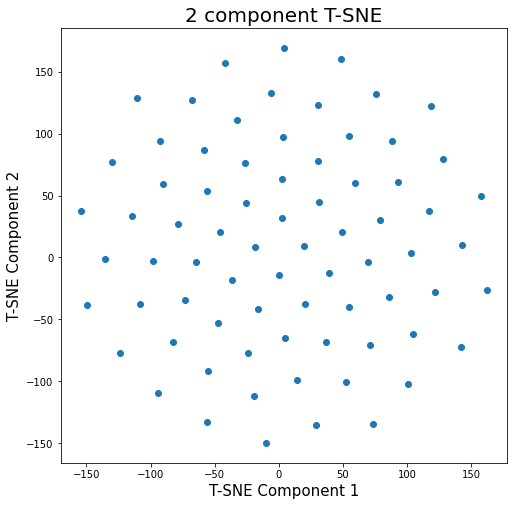

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('T-SNE Component 1', fontsize = 15)
ax.set_ylabel('T-SNE Component 2', fontsize = 15)
ax.set_title('2 component T-SNE', fontsize = 20)
plt.scatter(tsne_result[:,0] , tsne_result[:,1])

In [58]:
#print(tsne_result)

In [59]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

tsne_df=pd.DataFrame(tsne_result)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tsne_df)
    distortions.append(kmeanModel.inertia_)


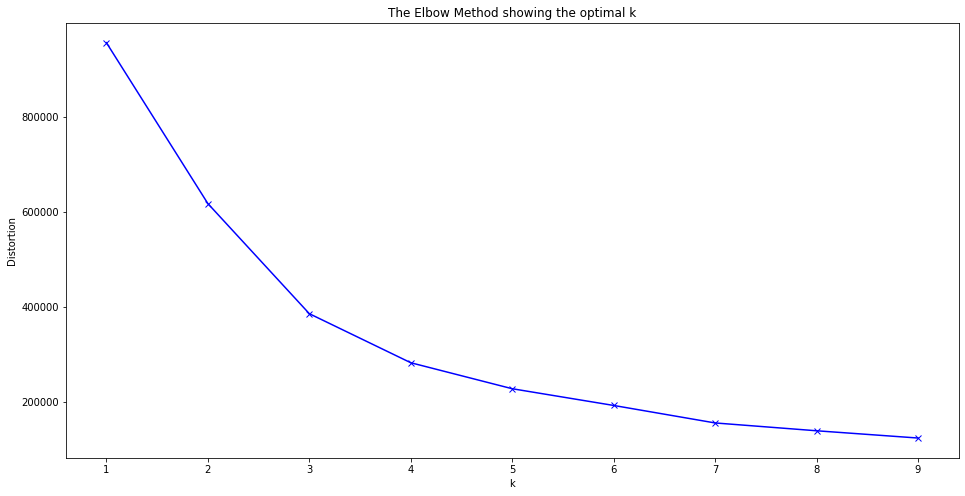

In [60]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()